In [3]:
%cd /content
!gdown --id 1y6IUt3WOF5LUjnLqlBNxjJrx7OObc5gq

/content
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1y6IUt3WOF5LUjnLqlBNxjJrx7OObc5gq
To: /content/deepfake.zip
100% 1.69G/1.69G [00:19<00:00, 85.8MB/s]


/content/copy


In [4]:
!unzip /content/deepfake.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [1]:
!mkdir ConvNext
%cd ConvNext
!pip install -q transformers datasets

/content/ConvNext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.1 MB/s eta 0:00:00


In [5]:
%cd /content/ConvNext

/content/ConvNext


In [6]:
from datasets import load_dataset

# we can load a custom dataset using the "imagefolder" feature
# details: https://huggingface.co/docs/datasets/image_process#imagefolder
dataset = load_dataset("imagefolder", data_files="/content/deepfake.zip")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-a503aca63524a432/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 179430
    })
})

In [8]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['Fake', 'Real'], id=None)}

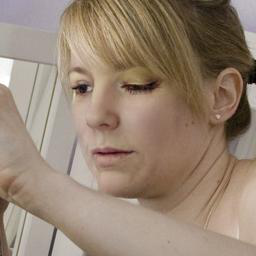

In [9]:
example = dataset["train"][0]
example["image"]

In [10]:
example["label"]

0

In [11]:
labels = dataset["train"].features["label"].names
print(labels)


['Fake', 'Real']


In [12]:

id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
print(id2label)

{0: 'Fake', 1: 'Real'}


In [14]:
id2label[1]

'Real'

In [15]:
from huggingface_hub import notebook_login

notebook_login()

In [17]:
dataset.push_to_hub("deepfake")

Map:   0%|          | 0/44858 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/4 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/449 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/44858 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/449 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/44857 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/449 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/44857 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/449 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:

from datasets import load_dataset

dataset = load_dataset("Whab/deepfake")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/179430 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Whab___parquet/Whab--deepfake-db0a72426bf54715/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
from transformers import ConvNextFeatureExtractor

feature_extractor = ConvNextFeatureExtractor.from_pretrained("facebook/convnext-tiny-224")

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


In [21]:
print(feature_extractor)

ConvNextFeatureExtractor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ConvNextFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}



In [23]:
from torchvision.transforms import (
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
)

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

transform = Compose([
    RandomResizedCrop((feature_extractor.size["shortest_edge"], feature_extractor.size["shortest_edge"])),
    RandomHorizontalFlip(),
    ToTensor(),
    normalize
])

def train_transforms(examples):
    examples["pixel_values"] = [transform(image.convert("RGB")) for image in examples["image"]]
    return examples


In [24]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 179430
    })
})

In [25]:
processed_dataset = dataset.with_transform(train_transforms)

In [27]:
processed_dataset["train"][0]["pixel_values"].shape

torch.Size([3, 224, 224])

In [28]:
len(labels)

2

In [29]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("facebook/convnext-tiny-224",
                                                        num_labels=len(labels),
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ignore_mismatched_sizes=True)

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-tiny-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

ConvNextForImageClassification(
  (convnext): ConvNextModel(
    (embeddings): ConvNextEmbeddings(
      (patch_embeddings): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (layernorm): ConvNextLayerNorm()
    )
    (encoder): ConvNextEncoder(
      (stages): ModuleList(
        (0): ConvNextStage(
          (downsampling_layer): Identity()
          (layers): Sequential(
            (0): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              (pwconv1): Linear(in_features=96, out_features=384, bias=True)
              (act): GELUActivation()
              (pwconv2): Linear(in_features=384, out_features=96, bias=True)
              (drop_path): Identity()
            )
            (1): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              

In [31]:
from torch.utils.data import DataLoader

def collate_fn(examples):
  pixel_values = torch.stack([example["pixel_values"] for example in examples])
  labels = torch.tensor([example["label"] for example in examples])

  return {"pixel_values": pixel_values, "labels": labels}

dataloader = DataLoader(processed_dataset["train"], collate_fn=collate_fn, batch_size=4, shuffle=True)

In [32]:

batch = next(iter(dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


In [33]:
from tqdm.notebook import tqdm

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

model.train()
for epoch in range(10):
  print("Epoch:", epoch)
  correct = 0
  total = 0
  for idx, batch in enumerate(tqdm(dataloader)):
    # move batch to GPU
    batch = {k:v.to(device) for k,v in batch.items()}

    optimizer.zero_grad()

    # forward pass
    outputs = model(pixel_values=batch["pixel_values"],
                    labels=batch["labels"])

    loss, logits = outputs.loss, outputs.logits
    loss.backward()
    optimizer.step()

    # metrics
    total += batch["labels"].shape[0]
    predicted = logits.argmax(-1)
    correct += (predicted == batch["labels"]).sum().item()

    accuracy = correct/total

    if idx % 100 == 0:
      print(f"Loss after {idx} steps:", loss.item())
      print(f"Accuracy after {idx} steps:", accuracy)

Epoch: 0


  0%|          | 0/44858 [00:00<?, ?it/s]

Loss after 0 steps: 0.6949135065078735
Accuracy after 0 steps: 0.5
Loss after 100 steps: 0.5791634321212769
Accuracy after 100 steps: 0.6336633663366337
Loss after 200 steps: 0.12762829661369324
Accuracy after 200 steps: 0.7077114427860697
Loss after 300 steps: 0.07747040688991547
Accuracy after 300 steps: 0.7558139534883721
Loss after 400 steps: 0.3498990535736084
Accuracy after 400 steps: 0.7817955112219451
Loss after 500 steps: 0.07830146700143814
Accuracy after 500 steps: 0.8008982035928144
Loss after 600 steps: 0.1911894977092743
Accuracy after 600 steps: 0.8223793677204659
Loss after 700 steps: 0.9176756739616394
Accuracy after 700 steps: 0.8313124108416547
Loss after 800 steps: 0.39484918117523193
Accuracy after 800 steps: 0.8398876404494382
Loss after 900 steps: 0.4727824032306671
Accuracy after 900 steps: 0.8487791342952276
Loss after 1000 steps: 0.020675014704465866
Accuracy after 1000 steps: 0.8571428571428571
Loss after 1100 steps: 0.1815262883901596
Accuracy after 1100 ste

  0%|          | 0/44858 [00:00<?, ?it/s]

Loss after 0 steps: 0.41798287630081177
Accuracy after 0 steps: 0.75
Loss after 100 steps: 0.008653329685330391
Accuracy after 100 steps: 0.9777227722772277
Loss after 200 steps: 0.015682214871048927
Accuracy after 200 steps: 0.9825870646766169
Loss after 300 steps: 0.02270697057247162
Accuracy after 300 steps: 0.9717607973421927
Loss after 400 steps: 0.0007411717087961733
Accuracy after 400 steps: 0.9706982543640897
Loss after 500 steps: 0.0018910911167040467
Accuracy after 500 steps: 0.9680638722554891
Loss after 600 steps: 0.012141467072069645
Accuracy after 600 steps: 0.9675540765391015
Loss after 700 steps: 0.3315625488758087
Accuracy after 700 steps: 0.9671897289586305
Loss after 800 steps: 0.0005023243138566613
Accuracy after 800 steps: 0.9684769038701623
Loss after 900 steps: 0.08554722368717194
Accuracy after 900 steps: 0.9683684794672586
Loss after 1000 steps: 0.001742055406793952
Accuracy after 1000 steps: 0.9665334665334665
Loss after 1100 steps: 0.0015892619267106056
Accur

KeyboardInterrupt: ignored

In [34]:
repo_name = "Whab/convnext-tiny-finetuned-eurosat"

model.push_to_hub(repo_name)
feature_extractor.push_to_hub(repo_name)

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/111M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Whab/convnext-tiny-finetuned-eurosat/commit/6fb555652a4d06f1ab8a0666cdbaceae2ff4ab49', commit_message='Upload feature extractor', commit_description='', oid='6fb555652a4d06f1ab8a0666cdbaceae2ff4ab49', pr_url=None, pr_revision=None, pr_num=None)

In [35]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

feature_extractor = AutoFeatureExtractor.from_pretrained("Whab/convnext-tiny-finetuned-eurosat")
model = AutoModelForImageClassification.from_pretrained("Whab/convnext-tiny-finetuned-eurosat")

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


In [38]:
from transformers import pipeline

pipe = pipeline("image-classification",
                model=model,
                feature_extractor=feature_extractor)

In [54]:

pipe("/content/drive/MyDrive/deep_fake_testing/Real/real_38.jpg")

[{'score': 0.9996827840805054, 'label': 'Real'},
 {'score': 0.0003172830620314926, 'label': 'Fake'}]